# БФИ2001 Фаттахов Тагир 

## Лабораторная работа №5 (Распознавание объектов на фотографиях)

In [1]:
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

Устанавливаем параметры для обучения ИНС

In [2]:
batch_size = 32
num_epochs = 36 
kernel_size = 3
pool_size = 2
conv_depth_1 = 32 
conv_depth_2 = 64 
drop_prob_1 = 0.25
drop_prob_2 = 0.5 
hidden_size = 512

Загрузка и нормализация данных обучения

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 
num_train, depth, height, width = X_train.shape 
num_test = X_test.shape[0] 
num_classes = np.unique(y_train).shape[0]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= np.max(X_train) 
X_test /= np.max(X_train) 
Y_train = np_utils.to_categorical(y_train, num_classes) 
Y_test = np_utils.to_categorical(y_test, num_classes) 

Создание свёрточной ИНС в функциональном виде с размером ядра свертки равной 3

In [4]:
inp = Input(shape=(depth, height, width))
conv_1 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)

conv_3 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)

flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)
model = Model(inputs=inp, outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_split=0.1)
history1 = model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/36
1407/1407 [==============================] - 150s 106ms/step - loss: 1.5248 - accuracy: 0.4424 - val_loss: 1.1401 - val_accuracy: 0.5944
Epoch 2/36
1407/1407 [==============================] - 148s 105ms/step - loss: 1.1113 - accuracy: 0.6028 - val_loss: 0.9167 - val_accuracy: 0.6870
Epoch 3/36
1407/1407 [==============================] - 149s 106ms/step - loss: 0.9383 - accuracy: 0.6692 - val_loss: 0.8058 - val_accuracy: 0.7176
Epoch 4/36
1407/1407 [==============================] - 142s 101ms/step - loss: 0.8385 - accuracy: 0.7047 - val_loss: 0.7434 - val_accuracy: 0.7380
Epoch 5/36
1407/1407 [==============================] - 142s 101ms/step - loss: 0.7701 - accuracy: 0.7292 - val_loss: 0.6952 - val_accuracy: 0.7616
Epoch 6/36
1407/1407 [==============================] - 143s 101ms/step - loss: 0.7138 - accuracy: 0.7484 - val_loss: 0.6846 - val_accuracy: 0.7610
Epoch 7/36
1407/1407 [==============================] - 142s 101ms/step - loss: 0.6679 - accuracy: 0.7666 - val_

Создание свёрточной ИНС с размером ядра свертки равной 3 без слоев Dropout

In [5]:
inp2 = Input(shape=(depth, height, width))
conv_2_1 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp2)
conv_2_2 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(conv_2_1)
pool_2_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2_2)

conv_2_3 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(conv_2_2)
conv_2_4 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(conv_2_3)
pool_2_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2_4)

flat2 = Flatten()(conv_2_4)
hidden2 = Dense(hidden_size, activation='relu')(flat2)
out2 = Dense(num_classes, activation='softmax')(hidden2)
model2 = Model(inputs=inp2, outputs=out2)
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history2 = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_split=0.1)
history2_1 = model2.evaluate(X_test, Y_test, verbose=1)

Epoch 1/36
1407/1407 [==============================] - 759s 539ms/step - loss: 1.3784 - accuracy: 0.5046 - val_loss: 1.0656 - val_accuracy: 0.6216
Epoch 2/36
1407/1407 [==============================] - 760s 540ms/step - loss: 0.9006 - accuracy: 0.6836 - val_loss: 0.8945 - val_accuracy: 0.6938
Epoch 3/36
1407/1407 [==============================] - 758s 539ms/step - loss: 0.5592 - accuracy: 0.8044 - val_loss: 0.9681 - val_accuracy: 0.6864
Epoch 4/36
1407/1407 [==============================] - 794s 565ms/step - loss: 0.2394 - accuracy: 0.9184 - val_loss: 1.2764 - val_accuracy: 0.6716
Epoch 5/36
1407/1407 [==============================] - 773s 550ms/step - loss: 0.1070 - accuracy: 0.9632 - val_loss: 1.6809 - val_accuracy: 0.6684
Epoch 6/36
1407/1407 [==============================] - 761s 541ms/step - loss: 0.0815 - accuracy: 0.9729 - val_loss: 1.9547 - val_accuracy: 0.6606
Epoch 7/36
1407/1407 [==============================] - 781s 555ms/step - loss: 0.0673 - accuracy: 0.9779 - val_

Создание свёрточной ИНС в функциональном виде с размером ядра свертки равной 5

In [4]:
kernel_size = 5
inp4 = Input(shape=(depth, height, width))
conv4_1 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp4)
conv4_2 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(conv4_1)
pool4_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv4_2)
drop4_1 = Dropout(drop_prob_1)(pool4_1)

conv4_3 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(drop4_1)
conv4_4 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(conv4_3)
pool4_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv4_4)
drop4_2 = Dropout(drop_prob_1)(pool4_2)

flat4 = Flatten()(drop4_2)
hidden4 = Dense(hidden_size, activation='relu')(flat4)
drop4_3 = Dropout(drop_prob_2)(hidden4)
out4 = Dense(num_classes, activation='softmax')(drop4_3)
model4 = Model(inputs=inp4, outputs=out4)
model4.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history4 = model4.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_split=0.1)
history4_1 = model4.evaluate(X_test, Y_test, verbose=1)

Epoch 1/36
1407/1407 [==============================] - 267s 189ms/step - loss: 1.6577 - accuracy: 0.3914 - val_loss: 1.3123 - val_accuracy: 0.5198
Epoch 2/36
1407/1407 [==============================] - 253s 180ms/step - loss: 1.2816 - accuracy: 0.5406 - val_loss: 1.0540 - val_accuracy: 0.6258
Epoch 3/36
1407/1407 [==============================] - 252s 179ms/step - loss: 1.1281 - accuracy: 0.5973 - val_loss: 0.9614 - val_accuracy: 0.6694
Epoch 4/36
1407/1407 [==============================] - 238s 169ms/step - loss: 1.0331 - accuracy: 0.6326 - val_loss: 0.9529 - val_accuracy: 0.6636
Epoch 5/36
1407/1407 [==============================] - 253s 180ms/step - loss: 0.9561 - accuracy: 0.6599 - val_loss: 0.8881 - val_accuracy: 0.6870
Epoch 6/36
1407/1407 [==============================] - 253s 180ms/step - loss: 0.9016 - accuracy: 0.6824 - val_loss: 0.8492 - val_accuracy: 0.7070
Epoch 7/36
1407/1407 [==============================] - 254s 180ms/step - loss: 0.8660 - accuracy: 0.6940 - val_

Создание свёрточной ИНС в функциональном виде с размером ядра свертки равной 2

In [6]:
kernel_size = 2
inp3 = Input(shape=(depth, height, width))
conv3_1 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp3)
conv3_2 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(conv3_1)
pool3_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv3_2)
drop3_1 = Dropout(drop_prob_1)(pool3_1)

conv3_3 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(drop3_1)
conv3_4 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(conv3_3)
pool3_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv3_4)
drop3_2 = Dropout(drop_prob_1)(pool3_2)

flat3 = Flatten()(drop3_2)
hidden3 = Dense(hidden_size, activation='relu')(flat3)
drop3_3 = Dropout(drop_prob_2)(hidden3)
out3 = Dense(num_classes, activation='softmax')(drop3_3)
model3 = Model(inputs=inp3, outputs=out3)
model3.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history3 = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_split=0.1)
history3_1 = model3.evaluate(X_test, Y_test, verbose=1)

Epoch 1/36
1407/1407 [==============================] - 117s 82ms/step - loss: 1.5669 - accuracy: 0.4266 - val_loss: 1.1854 - val_accuracy: 0.5764
Epoch 2/36
1407/1407 [==============================] - 115s 82ms/step - loss: 1.1634 - accuracy: 0.5842 - val_loss: 0.9528 - val_accuracy: 0.6596
Epoch 3/36
1407/1407 [==============================] - 116s 83ms/step - loss: 1.0123 - accuracy: 0.6422 - val_loss: 0.8620 - val_accuracy: 0.6988
Epoch 4/36
1407/1407 [==============================] - 116s 83ms/step - loss: 0.9330 - accuracy: 0.6701 - val_loss: 0.8219 - val_accuracy: 0.7120
Epoch 5/36
1407/1407 [==============================] - 116s 82ms/step - loss: 0.8588 - accuracy: 0.6980 - val_loss: 0.7539 - val_accuracy: 0.7332
Epoch 6/36
1407/1407 [==============================] - 115s 82ms/step - loss: 0.8027 - accuracy: 0.7154 - val_loss: 0.7270 - val_accuracy: 0.7454
Epoch 7/36
1407/1407 [==============================] - 112s 80ms/step - loss: 0.7537 - accuracy: 0.7317 - val_loss: 0

Графики потерь для моделей с различными ядрами свёртки

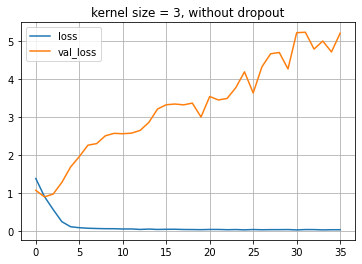

In [7]:
plt.plot(history2.history['loss'], label = 'loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.title('kernel size = 3, without dropout')
plt.grid(True)
plt.legend()
plt.show()

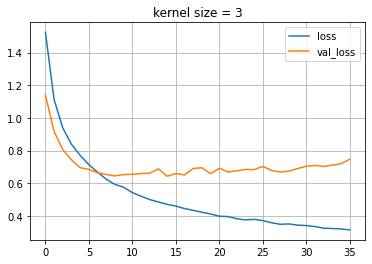

In [6]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('kernel size = 3')
plt.grid(True)
plt.legend()
plt.show()

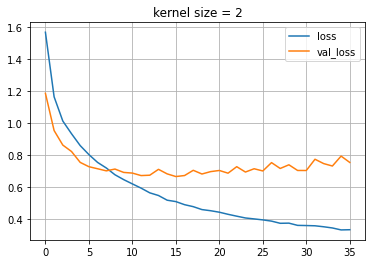

In [7]:
plt.plot(history3.history['loss'], label = 'loss')
plt.plot(history3.history['val_loss'], label = 'val_loss')
plt.title('kernel size = 2')
plt.grid(True)
plt.legend()
plt.show()

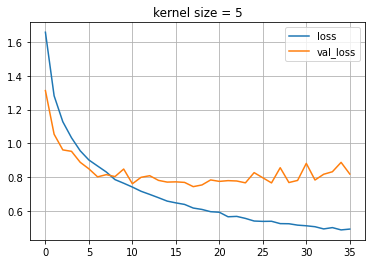

In [5]:
plt.plot(history4.history['loss'], label = 'loss')
plt.plot(history4.history['val_loss'], label = 'val_loss')
plt.title('kernel size = 5')
plt.grid(True)
plt.legend()
plt.show()